In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv("water quality prediction.csv")

In [4]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [5]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='rbf', random_state=42)

In [9]:
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [10]:
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [11]:
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [12]:
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

=== Decision Tree ===
Accuracy: 0.5635808748728383
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       617
           1       0.43      0.49      0.46       366

    accuracy                           0.56       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.56      0.57       983



In [13]:
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


=== Random Forest ===
Accuracy: 0.688708036622584
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



In [14]:
print("\n=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


=== Support Vector Machine ===
Accuracy: 0.6927772126144456
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.71      0.30      0.42       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.60       983
weighted avg       0.70      0.69      0.65       983



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [16]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

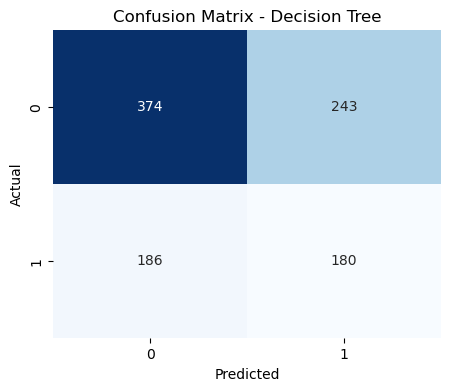

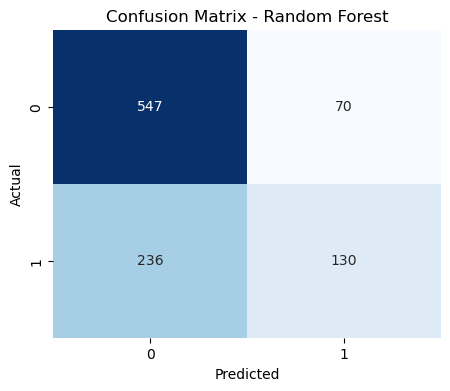

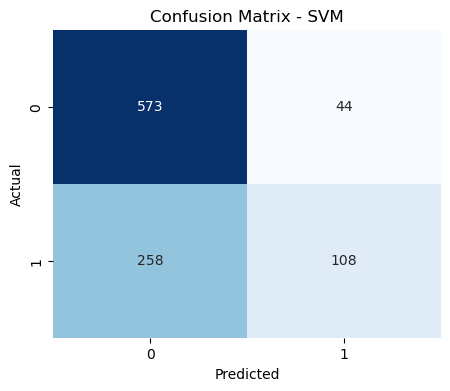

In [17]:
plot_conf_matrix(y_test, dt_preds, "Decision Tree")
plot_conf_matrix(y_test, rf_preds, "Random Forest")
plot_conf_matrix(y_test, svm_preds, "SVM")

In [18]:
dt_acc = accuracy_score(y_test, dt_preds)
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

In [24]:
accuracy_data = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [dt_acc, rf_acc, svm_acc]
})

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
accuracy_data = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [dt_acc, rf_acc, svm_acc]
})

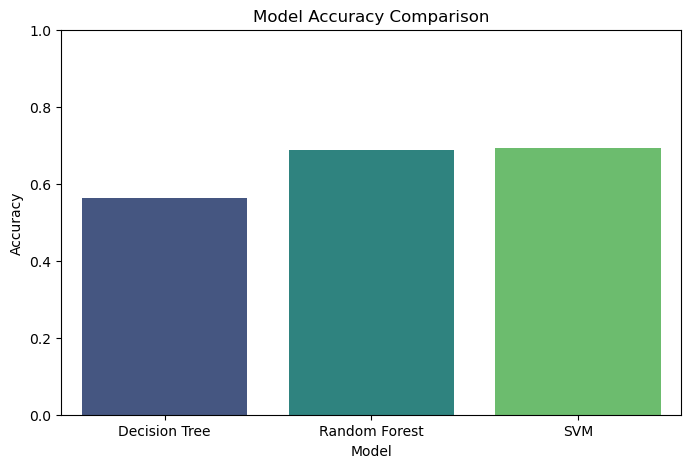

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_data, x="Model", y="Accuracy", hue="Model", palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend([], [], frameon=False)  # Hide the redundant legend
plt.show()